In [1]:
%env KERAS_BACKEND = tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [5]:
len(x_train)

60000

In [6]:
len(y_train)

60000

In [7]:
len(x_test)

10000

In [8]:
len(y_test)

10000

In [9]:
x_train[4414].shape

(28, 28)

In [10]:
x_train[4414]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   7, 174, 253, 253, 174,
         68,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  15, 252, 252, 252, 252,
        236, 171,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   6,  88,  88, 193, 245,
        252, 236,  67,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

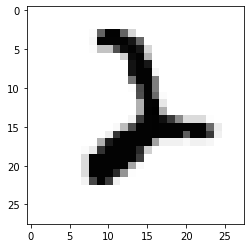

In [11]:
plt.imshow(x_train[4414],cmap='Greys')

In [12]:
y_train[4414]

2

## 輸入端必須被拉平

In [13]:
x_train = x_train.reshape(60000,28*28)

In [14]:
x_test = x_test.reshape(10000,28*28)

In [15]:
x_train[4414].shape

(784,)

## One-Hot Enconding
y值必須是連續的數字，然而1跟2之間有1.5等等的小數點存在，當電腦識別出1.5時會因不知道到底是1還是2，然而1跟2之間卻根本不應該辨識錯誤，長相差很多

所以我們將y改成10維向量，ex:1 => [0,1,0,0,0,0,0,0,0,0]

每個向量代表的都是他代表這個數字的機率，最小為0，最大值為1，相加總合則必須是1

In [16]:
from keras.utils import np_utils

In [17]:
y_train = np_utils.to_categorical(y_train,10)

In [18]:
y_test = np_utils.to_categorical(y_test,10)

In [19]:
y_train[4414]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## 建構神經網路

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [21]:
model = Sequential()

In [22]:
model.add(Dense(500,input_dim=784))
model.add(Activation('sigmoid'))

In [23]:
model.add(Dense(500))
model.add(Activation('sigmoid'))

In [24]:
model.add(Dense(10))
model.add(Activation('softmax'))

## 組裝神經網路

In [25]:
model.compile(loss='mse',optimizer=SGD(lr=0.1),metrics=['accuracy'])

## summary
可以看到組裝好的神經網路

Param = （輸入數據維度+1）* 神經元個數

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


## 將神經網路畫成圖

In [27]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model01.png')

![我的神經網路](model01.png)

## 訓練神經網路

In [28]:
model.fit(x_train, y_train, batch_size = 100, epochs = 100)




Epoch 1/100





60000/60000 [==============================] - 7s 111us/step - loss: 0.0818 - acc: 0.3615
Epoch 2/100
60000/60000 [==============================] - 6s 101us/step - loss: 0.0621 - acc: 0.6161
Epoch 3/100
60000/60000 [==============================] - 6s 108us/step - loss: 0.0449 - acc: 0.7782
Epoch 4/100
60000/60000 [==============================] - 6s 102us/step - loss: 0.0326 - acc: 0.8481
Epoch 5/100
60000/60000 [==============================] - 6s 103us/step - loss: 0.0254 - acc: 0.8739
Epoch 6/100
60000/60000 [==============================] - 6s 101us/step - loss: 0.0213 - acc: 0.8881
Epoch 7/100
60000/60000 [==============================] - 6s 102us/step - loss: 0.0187 - acc: 0.8976
Epoch 8/100
60000/60000 [==============================] - 6s 102us/step - loss: 0.0169 - acc: 0.9052
Epoch 9/100
60000/60000 [==============================] - 6s 102us/step - loss: 0.0156 - acc: 0.9103
Epoch 10/100
60000/60000 [==============================] - 6s 102us/step 

In [29]:
from ipywidgets import interact_manual

## predict_class
讓系統從10個種類中選出機率最大的

In [30]:
predict = model.predict_classes(x_test)

In [48]:
def test(test_num):
    plt.imshow(x_test[test_num].reshape(28,28), cmap = 'Greys')
    print('Ans:{},AI:{}'.format(
        y_test[test_num],
        predict[test_num]))

In [49]:
interact_manual(test,test_num = (0,9999))

interactive(children=(IntSlider(value=4999, description='test_num', max=9999), Button(description='Run Interac…

<function __main__.test(test_num)>

In [51]:
model_json = model.to_json()
open('nn_write_architecture.json','w').write(model_json)
model.save_weights('nn_write_weight.h5')